In [64]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [65]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [66]:
NUM_CLASSES = 5

# Dataset reading

In [67]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [68]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [70]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [71]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_10 (Dropout)                 │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 5)                   │              55 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,125 (4.39 KB)

 Trainable params: 1,125 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [73]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [74]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 21s 758ms/step - accuracy: 0.1406 - loss: 1.9409
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1725 - loss: 1.7939 - val_accuracy: 0.3358 - val_loss: 1.4841
Epoch 2/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3516 - loss: 1.4832
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3143 - loss: 1.4803 - val_accuracy: 0.3505 - val_loss: 1.3802
Epoch 3/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3359 - loss: 1.4470
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3786 - loss: 1.3821 - val_accuracy: 0.4208 - val_loss: 1.3132
Epoch 4/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3594 - loss: 1.3710
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ker

 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7031 - loss: 0.8002
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6718 - loss: 0.8435 - val_accuracy: 0.8864 - val_loss: 0.5567
Epoch 26/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6875 - loss: 0.8312
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6884 - loss: 0.8119 - val_accuracy: 0.8840 - val_loss: 0.5433
Epoch 27/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6797 - loss: 0.8042
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7017 - loss: 0.7667 - val_accuracy: 0.8954 - val_loss: 0.5252
Epoch 28/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6797 - loss: 0.7141
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29

 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7344 - loss: 0.6500
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7496 - loss: 0.6527 - val_accuracy: 0.9167 - val_loss: 0.3562
Epoch 50/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7500 - loss: 0.6914
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7658 - loss: 0.6460 - val_accuracy: 0.9101 - val_loss: 0.3570
Epoch 51/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7969 - loss: 0.5796
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7542 - loss: 0.6485 - val_accuracy: 0.9183 - val_loss: 0.3491
Epoch 52/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7422 - loss: 0.6626
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29

 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8125 - loss: 0.5233
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7763 - loss: 0.5852 - val_accuracy: 0.9379 - val_loss: 0.3007
Epoch 74/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7734 - loss: 0.5382
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7628 - loss: 0.6091 - val_accuracy: 0.9404 - val_loss: 0.2982
Epoch 75/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7344 - loss: 0.7384
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7795 - loss: 0.5817 - val_accuracy: 0.9412 - val_loss: 0.2922
Epoch 76/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8047 - loss: 0.5194
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29

 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8125 - loss: 0.4799
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7922 - loss: 0.5652 - val_accuracy: 0.9485 - val_loss: 0.2690
Epoch 98/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7422 - loss: 0.6568
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7860 - loss: 0.5722 - val_accuracy: 0.9436 - val_loss: 0.2658
Epoch 99/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7734 - loss: 0.5961
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8043 - loss: 0.5379 - val_accuracy: 0.9493 - val_loss: 0.2557
Epoch 100/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7734 - loss: 0.5048
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/

 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8203 - loss: 0.5403
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7986 - loss: 0.5361 - val_accuracy: 0.9485 - val_loss: 0.2555
Epoch 122/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8828 - loss: 0.4346
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8160 - loss: 0.5166 - val_accuracy: 0.9542 - val_loss: 0.2472
Epoch 123/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7891 - loss: 0.5174
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8070 - loss: 0.5039 - val_accuracy: 0.9518 - val_loss: 0.2486
Epoch 124/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8672 - loss: 0.4406
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier.kera

In [75]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.9503 - loss: 0.2419


In [76]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [77]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[9.6852589e-01 3.0040681e-02 1.9262547e-05 1.2739328e-03 1.4032303e-04]
0


# Confusion matrix

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step


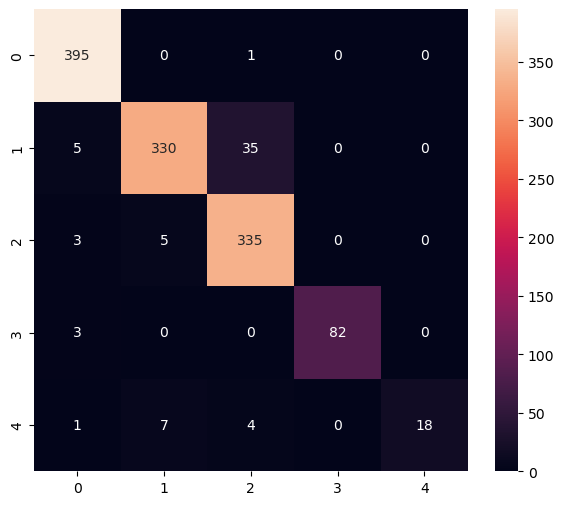

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       396
           1       0.96      0.89      0.93       370
           2       0.89      0.98      0.93       343
           3       1.00      0.96      0.98        85
           4       1.00      0.60      0.75        30

    accuracy                           0.95      1224
   macro avg       0.97      0.89      0.92      1224
weighted avg       0.95      0.95      0.95      1224



In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [79]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [80]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\quay\AppData\Local\Temp\tmptbin5akb\assets


INFO:tensorflow:Assets written to: C:\Users\quay\AppData\Local\Temp\tmptbin5akb\assets


Saved artifact at 'C:\Users\quay\AppData\Local\Temp\tmptbin5akb'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_5')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2320463487312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2320605314896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2320605311824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2320605314320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2320605310672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2320605313552: TensorSpec(shape=(), dtype=tf.resource, name=None)


6600

# Inference test

In [81]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [82]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [83]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [84]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [85]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.6852577e-01 3.0040743e-02 1.9262599e-05 1.2739344e-03 1.4032326e-04]
0
